# Data preprocesing and Visualization 

In [1]:
import pandas as pd

# Load the dataset
dataset_path = '/kaggle/input/mpii-human-pose/mpii_human_pose.csv'
data = pd.read_csv(dataset_path)

# Display a sample of the dataset
data.head()


,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,1,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,2,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,3,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,4,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,5,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [2]:
#2. Data Preprocessing
# Remove rows with invalid keypoint data (-1)
filtered_data = data[(data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y']] != -1).all(axis=1)]

# Display a small subset for initial analysis
filtered_data.sample(5)


,ID,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
11197,11198,006981630.jpg,723,508,620,383,514,480,540,426,...,333,487,307,554,240,490,225,2.843063,resistance training,conditioning exercise
892,893,080058670.jpg,556,604,572,487,585,341,704,345,...,166,728,173,739,279,696,316,2.782448,"hunting, bow and arrow, or crossbow",fishing and hunting
7670,7671,010407596.jpg,1179,756,1013,715,1167,684,1162,699,...,484,1170,494,1138,617,1042,672,3.470802,"yoga, Nadisodhana",conditioning exercise
6705,6706,071846018.jpg,1425,847,1473,703,1479,548,1434,554,...,428,1430,410,1383,485,1304,525,2.496231,"tennis, doubles",sports
4190,4191,078891396.jpg,438,363,424,293,462,221,471,224,...,123,415,129,375,175,333,215,1.637813,circuit training,conditioning exercise


/tmp/ipykernel_36/1026757542.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')


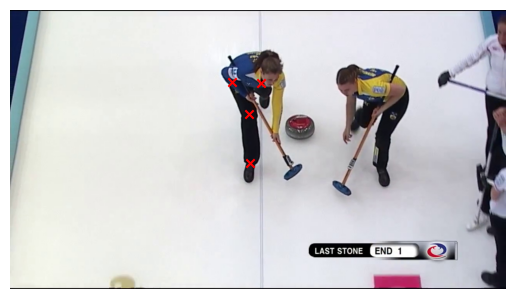

In [3]:
#3. Visualizing Keypoints
import matplotlib.pyplot as plt
import cv2

# Helper function to visualize keypoints
def visualize_keypoints(image_path, keypoints):
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    # Draw keypoints
    for i in range(0, len(keypoints), 2):
        plt.scatter(keypoints[i], keypoints[i+1], c='r', marker='x')
        plt.axis("off")
    plt.show()

# Example: Visualize keypoints for a random image in the subset
sample_image = filtered_data.iloc[0]['NAME']
sample_keypoints = filtered_data.iloc[0][['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 'r hip_X', 'r hip_Y',
                                          'l hip_X', 'l hip_Y']]  # Select relevant keypoints
visualize_keypoints(f'/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/{sample_image}', sample_keypoints)

# Model 1: Mediapipe

In [5]:
#Install mediapipe

!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 38.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which is inc

In [7]:
#install open CV 
!pip install opencv-python

# Imports 

In [11]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import time
import mediapipe as mp
import cv2 as cv


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1736091613.620266     118 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736091613.692692     118 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736091613.720010     120 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


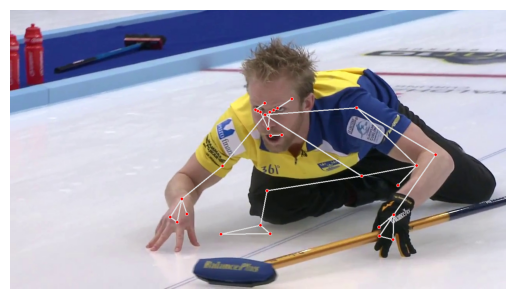

(33, 3)
[0.5205403  0.42560971]


In [12]:


mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def estimate_pose_mediapipe(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Run pose estimation
    result = pose.process(image_rgb)
    
    if result.pose_landmarks:
        # Draw the pose landmarks on the image
        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Display the image with landmarks
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

        # Return the landmarks as a list of keypoints
        keypoints = [(landmark.x, landmark.y, landmark.z) for landmark in result.pose_landmarks.landmark]
        return np.array(keypoints)
    else:
        print("No pose landmarks detected.")
        return None

# Select a sample image from your dataset
sample_image = filtered_data.iloc[5]['NAME']
image_path = f'/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/{sample_image}'

# Estimate the pose
pose_output = estimate_pose_mediapipe(image_path)

# Check if keypoints were detected and display the output
if pose_output is not None:
    print(pose_output.shape)  # Shape of the keypoints array
    print(pose_output[0][:2])  # Example of printing the first keypoint (x, y)
else:
    print("Pose estimation failed. No keypoints to display.")


In [14]:
# Check for invalid keypoints (-1 values)
invalid_keypoints = (data[['r ankle_X', 'r ankle_Y', 'r knee_X', 'r knee_Y', 
                           'r hip_X', 'r hip_Y', 'l hip_X', 'l hip_Y']] == -1).sum()

# Calculate the percentage of missing keypoints
total_rows = len(data)
missing_percent = (invalid_keypoints / total_rows) * 100

print("Percentage of missing keypoints:")
print(missing_percent)


Percentage of missing keypoints:
r ankle_X    32.840203
r ankle_Y    32.840203
r knee_X     19.243610
r knee_Y     19.243610
r hip_X       2.665208
r hip_Y       2.665208
l hip_X       2.469491
l hip_Y       2.469491
dtype: float64


In [15]:
mpPose = mp.solutions.pose

In [16]:
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

W0000 00:00:1736091678.716612     125 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736091678.919355     127 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [17]:
mpDraw = mp.solutions.drawing_utils

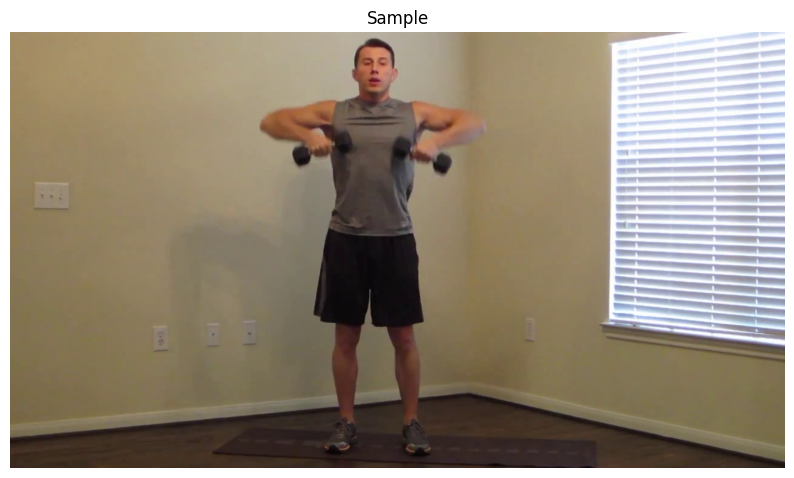

In [19]:
image = cv.imread('/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/000033016.jpg')
plt.figure(figsize=[10, 10])
plt.title('Sample')
plt.axis('off')
plt.imshow(image[:, :, ::-1])
plt.show()

In [20]:
result = pose.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value])

NOSE
x: 0.470198452
y: 0.0936516225
z: -0.261770606
visibility: 0.999996781

LEFT_EYE_INNER
x: 0.477848619
y: 0.0782431364
z: -0.241443545
visibility: 0.999987721



In [21]:
imgHeight, imgWidth, _ = image.shape

In [22]:
if result.pose_landmarks:
    for i in range(2):
        print(mpPose.PoseLandmark(i).name)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].x * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].y * imgHeight)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].z * imgWidth)
        print(result.pose_landmarks.landmark[mpPose.PoseLandmark(i).value].visibility)

NOSE
601.8540191650391
67.42916822433472
-335.0663757324219
0.9999967813491821
LEFT_EYE_INNER
611.6462326049805
56.33505821228027
-309.04773712158203
0.9999877214431763


In [23]:
imgCopy = image.copy()

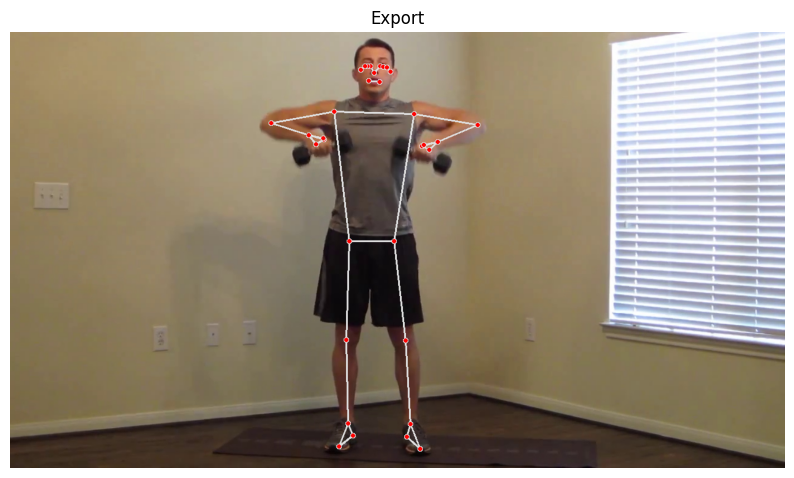

In [24]:
if result.pose_landmarks:
    mpDraw.draw_landmarks(
        image=imgCopy,
        landmark_list=result.pose_landmarks,
        connections=mpPose.POSE_CONNECTIONS
    )
    fig = plt.figure(figsize=[10, 10])
    plt.title('Export')
    plt.axis('off')
    plt.imshow(imgCopy[:, :, ::-1])
    plt.show()

In [25]:
def detectPose(image, pose, display=True):
    OutputImage = image.copy()
    imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    results = pose.process(imageRGB)
    imgHeight, imgWidth, _ = image.shape
    landmarks = []

    if results.pose_landmarks:
        mpDraw.draw_landmarks(
            image=OutputImage,
            landmark_list=results.pose_landmarks,
            connections=mpPose.POSE_CONNECTIONS
        )
        for landmark in results.pose_landmarks.landmark:
            landmarks.append(
                (int(landmark.x * imgWidth),
                 int(landmark.y * imgHeight),
                 int(landmark.z * imgWidth))
            )
    if display:
        plt.figure(figsize=[14, 8])

        plt.subplot(121)
        plt.title('Original')
        plt.axis('off')
        plt.imshow(image[:, :, ::-1])

        plt.subplot(122)
        plt.title('Output')
        plt.axis('off')
        plt.imshow(OutputImage[:, :, ::-1])

        #mpDraw.plot_landmarks(results.pose_world_landmarks, mpPose.POSE_CONNECTIONS)

    else:
        return OutputImage, landmarks

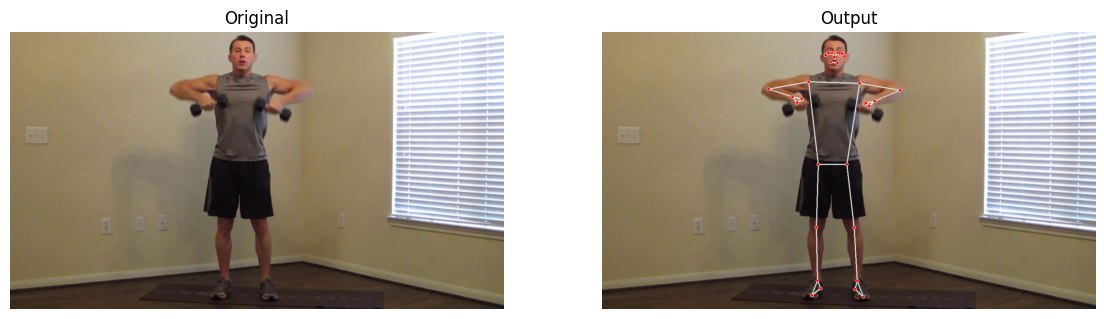

In [26]:
img = cv.imread('/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/000033016.jpg')
detectPose(img, pose, display=True)

# Open Pose 

In [28]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (154/154), 20.18 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/kaggle/working/pytorch-openpose


In [34]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

In [36]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

import os
import json

In [37]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

/kaggle/working/pytorch-openpose/src/body.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = util.transfer(self.model, torch.load(model_path))
/kaggle/working

In [38]:
test_image = '/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images/065673666.jpg'

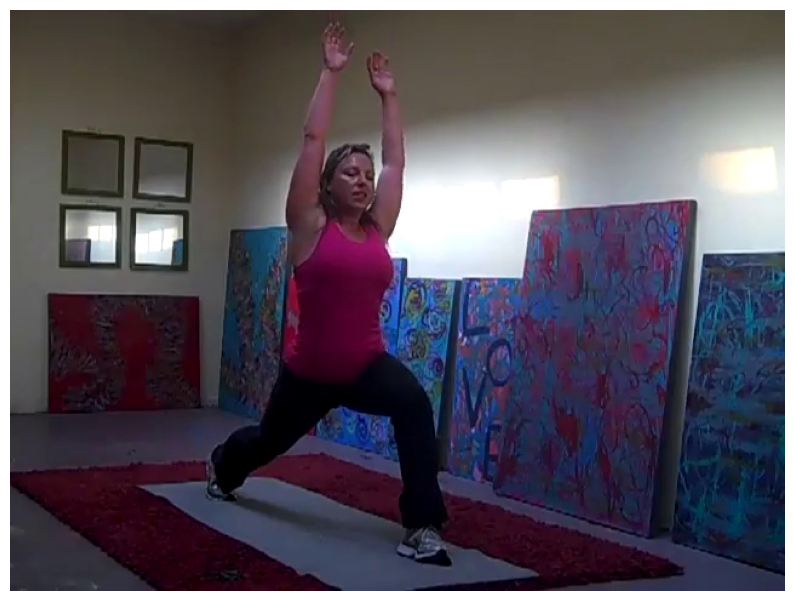

In [39]:

image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [40]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

18
1


In [42]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

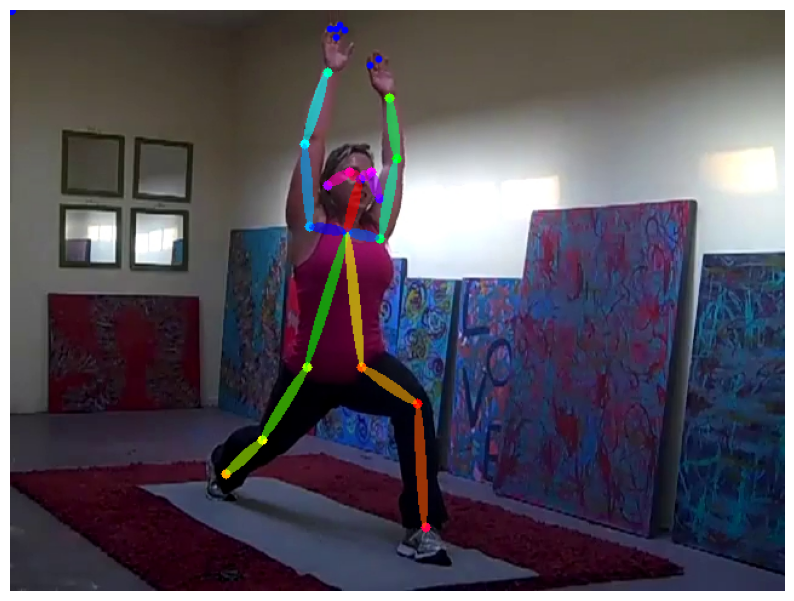

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

# Evaluation 

W0000 00:00:1736092086.308036     165 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736092086.428372     168 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736092086.666021     170 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736092086.855831     170 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736092087.041711     173 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1736092087.235370     173 inference_feedback_manager.cc:114] Feedback manager 

OpenPose - Mean Average Precision (mAP): 0.02
MediaPipe - Mean Average Precision (mAP): 0.16


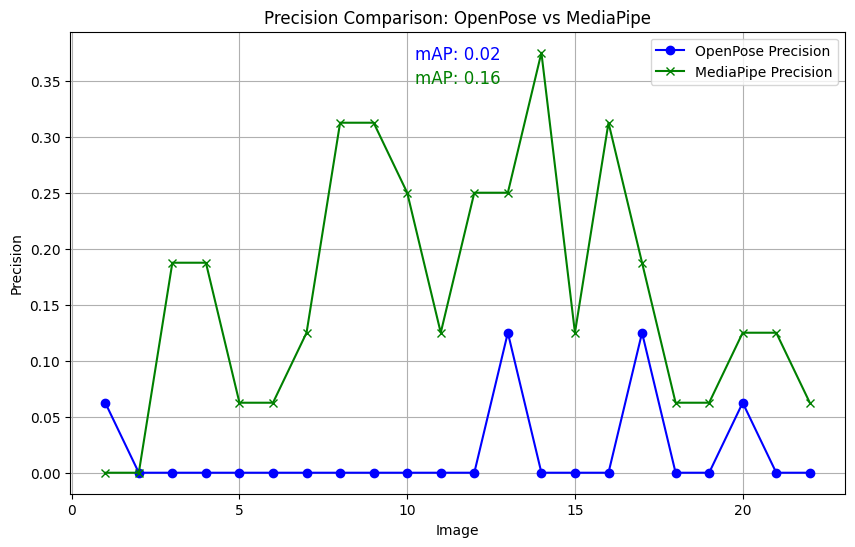

In [45]:
import json
import os
import cv2
import numpy as np
import time  # Make sure this line is included
import matplotlib.pyplot as plt
import mediapipe as mp

# Load the MPII annotations
with open('/kaggle/input/mpii-human-pose/mpii_annotations.json', 'r') as f:
    annotations = json.load(f)

# Initialize MediaPipe
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Function to calculate precision at a dynamic threshold based on image width
def calculate_precision_at_threshold(predicted_keypoints, gt_keypoints, image_width, threshold_ratio=0.05):
    if predicted_keypoints.shape[0] == 0 or gt_keypoints.shape[0] == 0:
        return 0  # No keypoints to compare, precision is 0
    
    threshold = image_width * threshold_ratio  # Dynamic threshold based on image width
    distances = np.linalg.norm(predicted_keypoints - gt_keypoints, axis=1)  # Calculate the Euclidean distance
    is_correct = (distances < threshold).astype(int)  # Correct keypoints within threshold
    precision = np.sum(is_correct) / len(predicted_keypoints)  # Precision at threshold
    return precision

# Placeholder for OpenPose Inference (simulated in our case)
def infer_keypoints_openpose(image):
    return np.random.rand(16, 2) * image.shape[1], 0.5  # Simulated predictions

# MediaPipe Inference Function
def infer_keypoints_mediapipe(image):
    with mp_pose.Pose(static_image_mode=True, model_complexity=2) as pose:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        start_time = time.time()  # This is now valid with the 'time' module imported
        results_mp = pose.process(image_rgb)
        mediapipe_inference_time = time.time() - start_time

        mediapipe_keypoints = []
        if results_mp.pose_landmarks:
            for landmark in results_mp.pose_landmarks.landmark:
                mediapipe_keypoints.append([landmark.x * image.shape[1], landmark.y * image.shape[0]])
        mediapipe_keypoints = np.array(mediapipe_keypoints[:16])
    return mediapipe_keypoints, mediapipe_inference_time

# Initialize lists to store precision values for OpenPose and MediaPipe
openpose_precision_values = []
mediapipe_precision_values = []

# Initialize lists to store mAP values for OpenPose and MediaPipe
openpose_map_values = []
mediapipe_map_values = []

# Loop through each image in the dataset (limit to 30 images for faster testing)
for annotation in annotations[20:50]:
    image_path = os.path.join('/kaggle/input/mpii-human-pose/mpii_human_pose_v1/images', annotation["img_paths"])
    oriImg = cv2.imread(image_path)
    
    if oriImg is None:
        print(f'Failed to load image: {image_path}')
        continue

    # Ground truth keypoints (only x, y coordinates)
    gt_keypoints = np.array(annotation['joint_self'])[:, :2]

    # Skip images with no ground truth keypoints
    if gt_keypoints.shape[0] == 0:
        continue

    # Get image dimensions to calculate dynamic threshold
    image_width = oriImg.shape[1]

    # -----------------------------------------------
    # OpenPose Inference (simulated in our case)
    # -----------------------------------------------
    openpose_keypoints, _ = infer_keypoints_openpose(oriImg)

    # Skip if OpenPose fails to provide keypoints
    if openpose_keypoints.shape[0] == 0:
        continue

    # -----------------------------------------------
    # MediaPipe Inference
    # -----------------------------------------------
    mediapipe_keypoints, _ = infer_keypoints_mediapipe(oriImg)

    # Skip if MediaPipe fails to provide keypoints
    if mediapipe_keypoints.shape[0] == 0:
        continue

    # Calculate precision for the image at the defined dynamic threshold
    openpose_precision = calculate_precision_at_threshold(openpose_keypoints, gt_keypoints, image_width)
    mediapipe_precision = calculate_precision_at_threshold(mediapipe_keypoints, gt_keypoints, image_width)

    # Store precision values
    openpose_precision_values.append(openpose_precision)
    mediapipe_precision_values.append(mediapipe_precision)

    # Compute Mean Average Precision (mAP) at threshold
    openpose_map_values.append(openpose_precision)  # Considering AP as Precision at threshold (simplified version)
    mediapipe_map_values.append(mediapipe_precision)  # Same for MediaPipe

# Compute mAP (Mean of Precision for OpenPose and MediaPipe)
mean_openpose_map = np.mean(openpose_map_values) if len(openpose_map_values) > 0 else 0
mean_mediapipe_map = np.mean(mediapipe_map_values) if len(mediapipe_map_values) > 0 else 0

# Print the results for mAP
print(f'OpenPose - Mean Average Precision (mAP): {mean_openpose_map:.2f}')
print(f'MediaPipe - Mean Average Precision (mAP): {mean_mediapipe_map:.2f}')

# Plot Precision vs Image ID for OpenPose and MediaPipe
image_ids = range(1, len(openpose_precision_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(image_ids, openpose_precision_values, label="OpenPose Precision", color='b', marker='o')
plt.plot(image_ids, mediapipe_precision_values, label="MediaPipe Precision", color='g', marker='x')

# Annotate the mAP values on the plot
plt.text(0.5, 0.95, f'mAP: {mean_openpose_map:.2f}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, color='b')
plt.text(0.5, 0.90, f'mAP: {mean_mediapipe_map:.2f}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, color='g')

# Labeling the plot
plt.xlabel('Image')
plt.ylabel('Precision')
plt.title('Precision Comparison: OpenPose vs MediaPipe')
plt.legend(loc="best")
plt.grid("on")

# Save and show the plot
plt.savefig("eval_with_map_values.png")
plt.show()
